# Floyd Steignberg Algorithm

## Image Creation

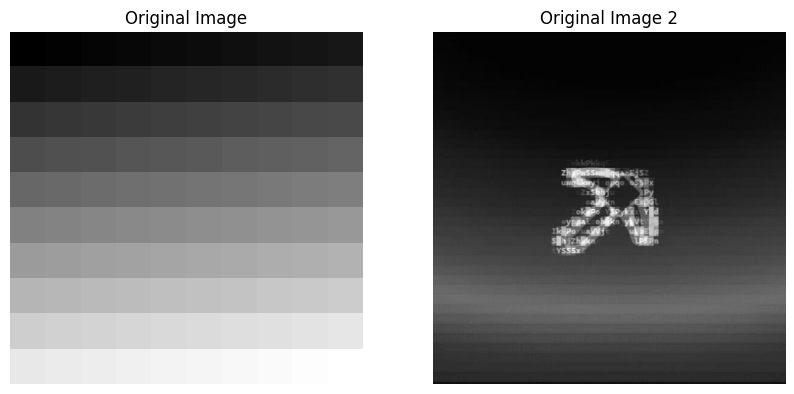

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = np.linspace(0, 1, 100).reshape(10, 10)
image_2 = cv2.imread("Assets/Organization_Icon_v0.1.jpg", cv2.IMREAD_GRAYSCALE)
image_2 = image_2.astype(np.float32) / 255.0

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_2, cmap='gray')
plt.title('Original Image 2')
plt.axis('off')
plt.show()

## Floyd Steinberg Dithering

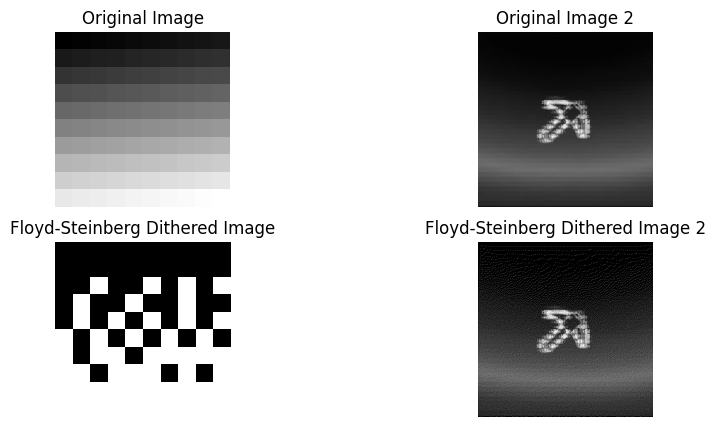

In [14]:
def floyd_steinberg_dither(image):
    dithered_image = image.copy()
    height, width = dithered_image.shape

    for y in range(height):
        for x in range (width):
            current_pixel = dithered_image[y, x]

            # Thresholding - 0 or 1
            updated_pixel = 1.0 if current_pixel > 0.5 else 0.0
            dithered_image[y, x] = updated_pixel

            # Error Calculation
            error = current_pixel - updated_pixel

            # Spread Error to neighbours with corresponding weights
            # Pixel to the right (7/16)
            if x + 1 < width:
                dithered_image[y, x + 1] += error * (7 / 16)
            
            # Pixel to the below-left (3/16)
            if x - 1 >=0 and y + 1 < height:
                dithered_image[y + 1, x - 1] += error * (3 / 16)

            # Pixel below (5/16)
            if y + 1 < height:
                dithered_image[y + 1, x] += error * (5 / 16)

            # Pixel below-right (1/16)
            if x + 1 < width and y + 1 < height:
                dithered_image[y + 1, x + 1] += error * (1 / 16)
    
    return dithered_image

dithered_image_1 = floyd_steinberg_dither(image)
dithered_image_2 = floyd_steinberg_dither(image_2)

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(image_2, cmap='gray')
plt.title('Original Image 2')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(dithered_image_1, cmap='gray')
plt.title('Floyd-Steinberg Dithered Image')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(dithered_image_2, cmap='gray')
plt.title('Floyd-Steinberg Dithered Image 2')
plt.axis('off')
plt.show()